In [1]:
!git clone https://github.com/dmc27/missing_pixels.git

fatal: destination path 'missing_pixels' already exists and is not an empty directory.


In [2]:
from os import listdir
from os.path import isfile

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint

from utils import *

In [3]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [4]:
img_path = "missing_pixels"
img_fnames = [f for f in listdir(img_path) if isfile(join(img_path, f)) if f != 'balloon.bmp']
print(img_fnames)

['frog.bmp', 'FOOTBALL.BMP', 'WALL.BMP', 'rooster.bmp', 'man.bmp', 'BEACH.BMP', 'airplane.bmp', 'hawaii.bmp', 'rabbits.bmp', '1fnoise.bmp', 'pelicans.bmp', 'baby.bmp', 'TABLE.BMP', 'valley.bmp', 'tank.bmp', 'baboon.bmp', 'kid.bmp', 'lily.bmp', 'bushes.bmp', 'branches.bmp', 'tulips.bmp', 'fox.bmp', 'birds.bmp', 'peppers.bmp', 'buds.bmp', 'bricks.bmp', 'FLOWERS.BMP', 'deer.bmp', 'fruits.bmp', 'desert.bmp', 'duck.bmp', 'horse.bmp', 'lena.bmp', 'sealion.bmp', 'TRAIN.BMP', 'helen.bmp', 'rainriver.bmp', 'stream.bmp', 'bark.bmp', 'SAIL.BMP', 'HOUSE.BMP', 'peak.bmp', 'PUMPKINS.BMP', 'barn.bmp', 'pony.bmp', 'bridge.bmp', 'eagle.bmp', 'barbara.bmp', 'beans.bmp', 'dune2.bmp', 'zelda.bmp', 'KIDS.BMP', 'cactus.bmp', 'sheep.bmp']


In [5]:
inputs = []
targets = []
num_imgs = 0
for img_fname in img_fnames:

    if (img_fname.lower() == "balloon.bmp"):
        continue

    img = cv.imread(join(img_path, img_fname), cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (256, 256), cv.INTER_LINEAR)
    img = img.astype(np.float64)

    do_parse_img(img, inputs, targets)

    num_imgs += 1

print("num_imgs =", num_imgs)

X_train = np.zeros((len(inputs), NUM_INP_NODES))
y_train = np.zeros((len(targets), NUM_OUT_NODES))
for idx in range(len(inputs)):
    X_train[idx, :] = inputs[idx]
    y_train[idx] = targets[idx]

num_imgs = 54


# Modeling

In [6]:
model_fname = "models/model.mlp.h5"

model = Sequential([
    Dense(120, input_shape=(NUM_INP_NODES,), activation="relu"),
    Dense(60, activation="relu"),
    Dense(NUM_OUT_NODES, activation='sigmoid')
])

model.compile(loss="mean_squared_error", optimizer="adam",
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               7320      
                                                                 
 dense_1 (Dense)             (None, 60)                7260      
                                                                 
 dense_2 (Dense)             (None, 4)                 244       
                                                                 
Total params: 14824 (57.91 KB)
Trainable params: 14824 (57.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-07-20 14:28:07.522283: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-07-20 14:28:07.522301: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2023-07-20 14:28:07.522305: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2023-07-20 14:28:07.522329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-20 14:28:07.522342: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
checkpoint = ModelCheckpoint(model_fname, monitor='loss', verbose=1,
                             save_best_only=True)
callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, epochs=450, batch_size=512,
                    validation_split=0.1, callbacks=callbacks_list)

Epoch 1/450
12/98 [==>...........................] - ETA: 0s - loss: 0.0627 - accuracy: 0.2624 

2023-07-20 14:28:07.783367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.3024
Epoch 1: loss improved from inf to 0.02937, saving model to models/model.mlp.h5
98/98 [==============================] - 1s 7ms/step - loss: 0.0294 - accuracy: 0.3024 - val_loss: 0.0082 - val_accuracy: 0.3609
Epoch 2/450
24/98 [======>.......................] - ETA: 0s - loss: 0.0053 - accuracy: 0.3691

2023-07-20 14:28:08.471276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


95/98 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.3884
Epoch 2: loss improved from 0.02937 to 0.00479, saving model to models/model.mlp.h5
98/98 [==============================] - 1s 5ms/step - loss: 0.0048 - accuracy: 0.3888 - val_loss: 0.0071 - val_accuracy: 0.3855
Epoch 3/450
88/98 [=========================>....] - ETA: 0s - loss: 0.0041 - accuracy: 0.4142
Epoch 3: loss improved from 0.00479 to 0.00414, saving model to models/model.mlp.h5
98/98 [==============================] - 1s 5ms/step - loss: 0.0041 - accuracy: 0.4158 - val_loss: 0.0069 - val_accuracy: 0.3736
Epoch 4/450
88/98 [=========================>....] - ETA: 0s - loss: 0.0039 - accuracy: 0.4312
Epoch 4: loss improved from 0.00414 to 0.00389, saving model to models/model.mlp.h5
98/98 [==============================] - 1s 5ms/step - loss: 0.0039 - accuracy: 0.4330 - val_loss: 0.0068 - val_accuracy: 0.4016
Epoch 5/450
91/98 [==========================>...] - ETA: 0s - loss: 0.0037 - accuracy: 

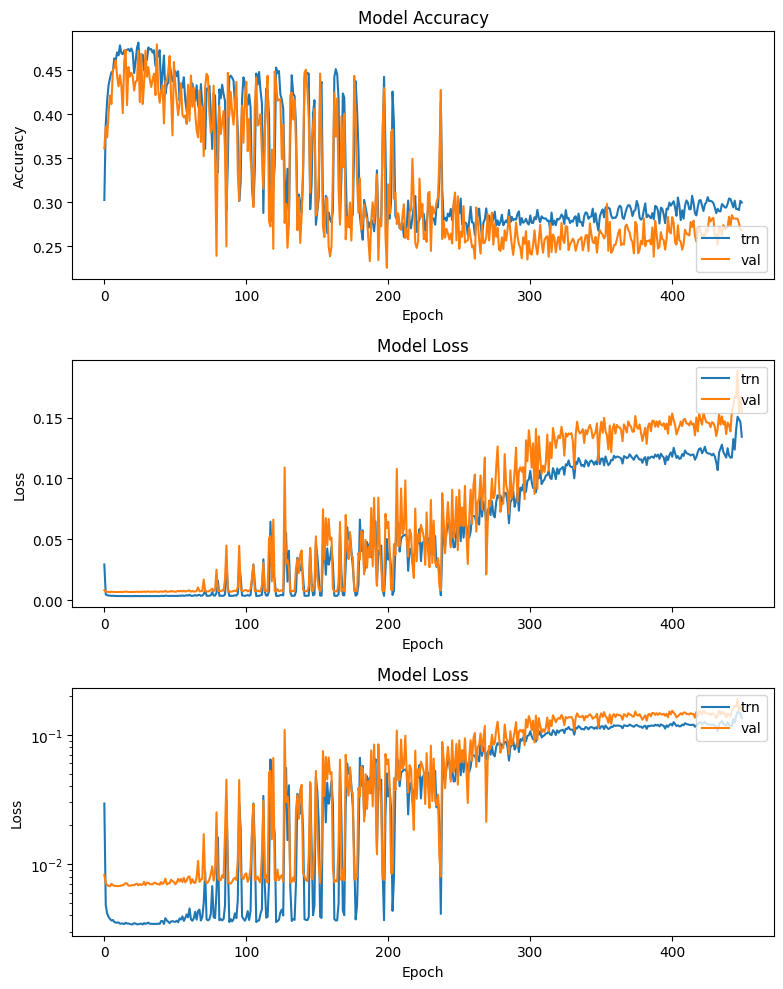

In [8]:
plot_training_history(history)

# Evaluation

32/32 [==============================] - 0s 1ms/step
MSE = 326.43


2023-07-20 14:31:56.333553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


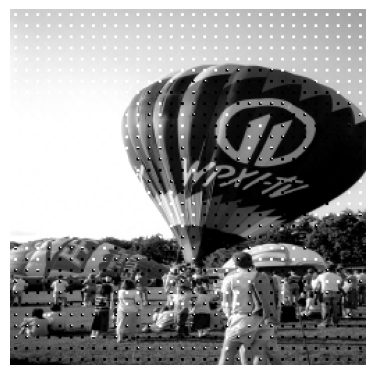

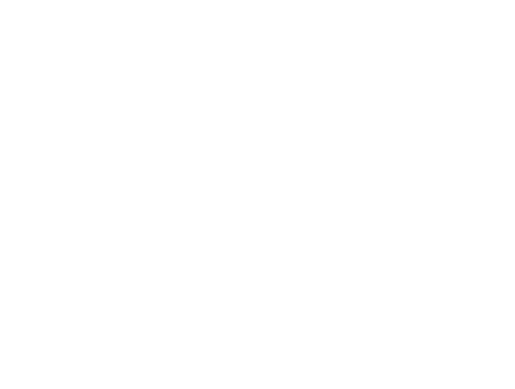

In [9]:
evaluate_mlp(model)